# Self-Consistent gap equation

$$\Delta = \lambda  \int_{-Ec}^{Ec} \Delta \frac{tanh(\frac {\sqrt{\xi^2 + |\Delta|^2}}{2KbT})}{2\sqrt{\xi^2 + |\Delta|^2}}d\xi $$

In [ ]:
import numpy as np

lam = 1
Ec = 1000
Kb = 1.38064852e-23
T = 1e-7


def simpson(f, a, b, N):
  if N%2 == 1:
    raise ValueError("N precisa ser par!")
  pares = 0
  impares = 0
  h = (b-a)/N
  for i in range(1, int(N/2)+1):
    impares += f(a + (2*i-1)*h)
  for i in range(1, int(N/2)):
    pares += f(a + 2*i*h) 
  return (h/3)*(f(a) + f(b) + 4*impares + 2*pares)
def f(E):
  return (lam*delta_in*np.tanh(np.sqrt(E**2 + abs(delta_in)**2)/(2*Kb*T)))/(2*(E**2 + abs(delta_in)**2)**(1/2))

In [ ]:
delta_in = 1
delta_fin = simpson(f, -Ec, Ec, 1000)
delta_in_list = [delta_in]
i = 0
while (abs(delta_in- delta_fin)>1e-8):
  delta_in = delta_fin
  delta_fin = simpson(f, -Ec, Ec, 1000)
  delta_in_list.append(delta_in)
  i +=1

In [ ]:
delta_in_list

[1,
 7.528241627620433,
 42.02455218903706,
 162.34461301733188,
 408.7359903912109,
 665.0959116348004,
 795.9380108381421,
 836.986051083368,
 847.5456284057111,
 850.1111434569732,
 850.7255691925632,
 850.8722114110558,
 850.9071808518422,
 850.9155182870666,
 850.9175060096896,
 850.917979896047,
 850.9180928734183,
 850.9181198078883,
 850.9181262292241,
 850.9181277601085,
 850.91812812508,
 850.9181282120915,
 850.9181282328356]

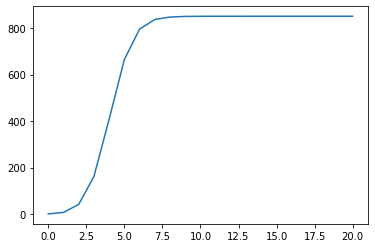

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(i+1), delta_in_list)